In [0]:
''''Random forests is a supervised learning algorithm. It can be used both for classification and regression. 
It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more 
trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, 
gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator 
of the feature importance.

It works in four steps:

*Select random samples from a given dataset.
*Construct a decision tree for each sample and get a prediction result from each decision tree.
*Perform a vote for each predicted result.
*Select the prediction result with the most votes as the final prediction.
................................................
Advantages: Random forests is considered as a highly accurate and robust method because of the number of decision trees 
            participating in the process.
            It does not suffer from the overfitting problem. The main reason is that it takes the average of all the 
            predictions, which cancels out the biases.
            The algorithm can be used in both classification and regression problems.
            Random forests can also handle missing values. (There are two ways to handle these: using median values to replace 
            continuous variables, and computing the proximity-weighted average of missing values.) 
            we can get the relative feature importance, which helps in selecting the most contributing features for the 
            classifier.
Disadvantages: Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a
               prediction, all the trees in the forest have to make a prediction for the same given input and then perform 
               voting on it. This whole process is time-consuming.
              The model is difficult to interpret compared to a decision tree, where you can easily make a decision by 
              following the path in the tree
...............................................
compair to other '''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-29-1619602cebeb>, line 29)

In [0]:
#importing libraries
import os
import pandas as pd
import numpy as np

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!mkdir '/content/drive/My Drive/Earthquake_damage'

mkdir: cannot create directory ‘/content/drive/My Drive/Earthquake_damage’: File exists


In [0]:
!unzip '/content/drive/My Drive/Earthquake_damage.zip' -d '/content/drive/My Drive/Earthquake_damage'

In [29]:
#open the dataset files and list the directories available in that dataset file
path="/content/drive/My Drive/Earthquake_damage/Earthquake_damage"
print(os.listdir(path))

['Building_Ownership_Use.csv', 'ReadMe.md', 'test.csv', 'sample_submission.csv', 'train.csv', 'Building_Structure.csv']


In [30]:
#open the csv file ,take first 10000 data from total data.pd.read_csv is used to read the csv file and do operations on it
training=pd.read_csv(path+'/train.csv')      
training.head()
data1=training[:10000]
data1.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
data1.head()

,area_assesed,building_id,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,Both,24385bfd2a2,Grade 4,0.0,0,0,0,0,0,0,0,0.0
1,Both,405d1bbebbf,Grade 2,0.0,0,0,0,0,0,0,0,1.0
2,Both,351d9bc71f6,Grade 1,0.0,0,0,0,0,0,0,0,0.0
3,Building removed,2be3a971166,Grade 5,0.0,0,0,0,0,0,0,0,0.0
4,Both,34c7d073ea6,Grade 3,0.0,0,0,0,0,0,0,0,0.0


In [0]:
data2=pd.read_csv(path+'/Building_Ownership_Use.csv')
data2.head()
data2.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

In [0]:
data3 = pd.merge(data2,data1,on=['building_id'])

In [0]:
data4=pd.read_csv(path+'/Building_Structure.csv')
data4.head()
data4.drop(['district_id','vdcmun_id','ward_id'],axis=1,inplace=True)

In [0]:
data= pd.merge(data4,data3,on=['building_id'])

In [36]:
data.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,area_assesed,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,6627e91213e,1,1,25,324,8,8,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,70201,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 3,0.0,0,0,0,0,0,0,0,1.0
1,a3773aa267,3,3,22,458,24,24,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,70208,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,a3b10bc634,1,2,4,600,10,20,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,0,0,1,1,1,0,0,0,Damaged-Repaired and used,70305,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 2,0.0,0,0,0,0,0,0,0,1.0
3,a3b1a442ee,2,2,27,425,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,70306,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 4,1.0,0,0,1,0,0,0,0,1.0
4,a3b1a44cb2,2,2,15,425,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,70306,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 2,0.0,0,0,0,0,0,0,0,1.0


In [0]:
data.drop('legal_ownership_status',axis=1,inplace=True)

In [38]:
#list the what are the featuers consider for training
features=list(data)
print(features)

['building_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'ward_id', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use

In [39]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,area_assesed,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,6627e91213e,1,1,25,324,8,8,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,70201,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 3,0.0,0,0,0,0,0,0,0,1.0
1,a3773aa267,3,3,22,458,24,24,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,70208,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 3,0.0,0,0,0,0,0,0,0,1.0
2,a3b10bc634,1,2,4,600,10,20,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,0,0,1,1,1,0,0,0,Damaged-Repaired and used,70305,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 2,0.0,0,0,0,0,0,0,0,1.0
3,a3b1a442ee,2,2,27,425,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,70306,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 4,1.0,0,0,1,0,0,0,0,1.0
4,a3b1a44cb2,2,2,15,425,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,70306,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,Grade 2,0.0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,355ce679f14,1,0,8,230,10,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,366707,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Building removed,Grade 5,0.0,0,0,0,0,0,0,0,0.0
9996,355ce67acc2,1,0,11,340,10,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,366707,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Building removed,Grade 5,0.0,0,0,0,0,0,0,0,0.0
9997,355ce67ba6d,1,0,20,374,10,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,366707,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Building removed,Grade 5,0.0,0,0,0,0,0,0,0,1.0
9998,355ce67c815,1,0,4,672,10,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble Clear-New building built,366707,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Building removed,Grade 5,0.0,0,0,0,0,0,0,0,1.0


In [40]:
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
# LabelEncode Book_Tablecolumn of df
data["damage_grade"] = le.fit_transform(data["damage_grade"])
# Inspecting encoded df
data.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,area_assesed,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,6627e91213e,1,1,25,324,8,8,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,70201,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,2,0.0,0,0,0,0,0,0,0,1.0
1,a3773aa267,3,3,22,458,24,24,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,70208,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,2,0.0,0,0,0,0,0,0,0,1.0
2,a3b10bc634,1,2,4,600,10,20,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,0,0,1,1,1,0,0,0,Damaged-Repaired and used,70305,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,1,0.0,0,0,0,0,0,0,0,1.0
3,a3b1a442ee,2,2,27,425,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,70306,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,3,1.0,0,0,1,0,0,0,0,1.0
4,a3b1a44cb2,2,2,15,425,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,70306,1.0,0.0,0,0,0,0,0,0,0,0,0,0,Both,1,0.0,0,0,0,0,0,0,0,1.0


In [41]:
data["damage_grade"].head()

0    2
1    2
2    1
3    3
4    1
Name: damage_grade, dtype: int64

In [0]:
#creating a dictionary for storing the  numeric value of corresponding string 
'''dictionary={}
i=0'''

In [0]:
'''for i in range(len(data)):
    word=data.loc[i,'damage_grade']
    if word not in dictionary:
        value=len(dictionary)
        dictionary[word]=value
        data.loc[i,'damage_grade']=dictionary[word]
    else:
        data.loc[i,'damage_grade']=dictionary[word]'''

In [0]:
#data['damage_grade'].head()

0    0
1    0
2    1
3    2
4    1
Name: damage_grade, dtype: object

In [0]:
#convertion is a function used to convert the string values in to numeric value ,where we take word is the key,
'''def convertion(dictionary,word):
    if word not in dictionary:
        value=len(dictionary)
        dictionary[word]=value
        return dictionary[word]
    else:
        return dictionary[word]'''
        

In [0]:
#go through each cell ,that cell contain value stored into variable word.then find the datatype of each cell values ,
#if it is objective then call convertion function.then we get the neumeric value corresponding object.then it consider the new
#new value of the that perticular cell
'''i=0
for i in range(len(data)):
    for feature in features:
        word=data.loc[i,feature]
        if data[feature].dtype==object:
            convertion(dictionary,word)
            new_data=dictionary[word]
            data.loc[i,feature]=new_data'''

KeyboardInterrupt: ignored

In [0]:
data=pd.get_dummies(data, columns=["area_assesed","condition_post_eq","plan_configuration","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position"],drop_first=True)

In [43]:
data.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,ward_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,area_assesed_Building removed,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,position_Attached-2 side,position_Attached-3 side,position_Not attached
0,6627e91213e,1,1,25,324,8,8,0,1,0,0,0,0,1,1,0,0,1,70201,1.0,0.0,0,0,0,0,0,0,0,0,0,0,2,0.0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,a3773aa267,3,3,22,458,24,24,0,1,0,0,0,0,1,1,0,0,1,70208,1.0,0.0,0,0,0,0,0,0,0,0,0,0,2,0.0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,a3b10bc634,1,2,4,600,10,20,0,0,0,0,0,1,1,1,0,0,0,70305,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,a3b1a442ee,2,2,27,425,14,14,0,1,0,0,0,0,1,1,0,0,0,70306,1.0,0.0,0,0,0,0,0,0,0,0,0,0,3,1.0,0,0,1,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,a3b1a44cb2,2,2,15,425,14,14,0,1,0,0,0,0,1,1,0,0,0,70306,1.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 

NameError: ignored

In [0]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    #dataNorm["has_geotechnical_risk_fault_crack"]=dataset["has_geotechnical_risk_fault_crack"]
    return dataNorm

In [46]:
data=normalize(data)
data.sample(5)

TypeError: ignored

In [0]:
relation=data.corr(method ='pearson')

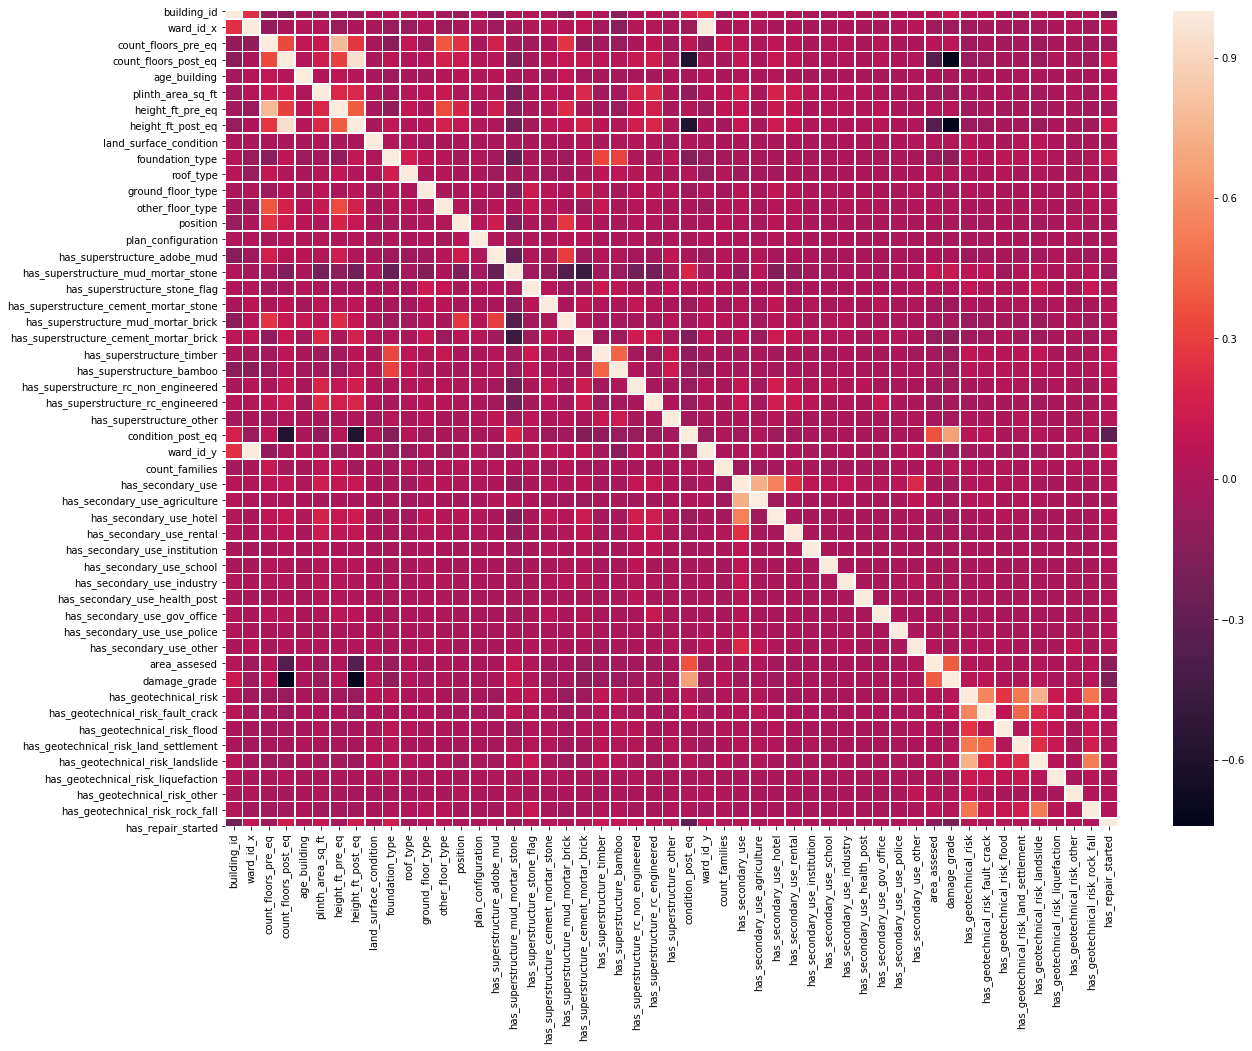

In [0]:

# importing the required module 
import matplotlib.pyplot as plt
import seaborn as sbn
plt.subplots(figsize=(20,15))
a=sbn.heatmap(relation,linewidth=0.5)

In [0]:
data.drop(['count_floors_pre_eq','has_secondary_use_agriculture','has_geotechnical_risk_landslide'],axis=1,inplace=True)

In [0]:
#data=data.drop('vdcmun_id', axis=1)

In [0]:
#data=data.drop('district_id_x', axis=1)

In [0]:
#data=data.drop('vdcmun_id_x', axis=1)

In [0]:
#data=data.drop('ward_id_y', axis=1)

In [0]:
#data=data.drop('district_id_y', axis=1)

In [0]:
#data=data.drop('vdcmun_id_y', axis=1)

In [0]:
data.head()

,building_id,ward_id_x,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,...,area_assesed,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,0.000000,0.000000,3.333333,0.500501,1.073542,0.430108,2.666667,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
1,0.021897,0.000315,10.000000,0.440440,1.639899,3.870968,8.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,0.027869,0.004685,6.666667,0.080080,2.240068,0.860215,6.666667,5.6,0.514706,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
3,0.039813,0.004730,6.666667,0.540541,1.500423,1.720430,4.666667,5.6,0.000000,0.0,...,0.0,8.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0,20.0
4,0.045785,0.004730,6.666667,0.300300,1.500423,1.720430,4.666667,5.6,0.000000,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [0]:
#list the what are the featuers consider for training
features=list(data)
print(features)

['building_id', 'ward_id_x', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'ward_id_y', 'count_families', 'has_secondary_use', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'are

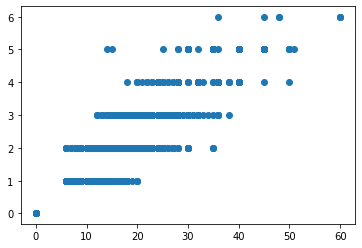

In [0]:
import matplotlib.pyplot as plt
#data.plot(x =data['height_ft_post_eq'], y=data['count_floors_post_eq'], kind = 'line')
#plt.show()
plt.scatter(data['height_ft_post_eq'], data['count_floors_post_eq'])
#plt.plot(data['height_ft_post_eq'], data['count_floors_post_eq'])
#plt.xlabel(data['height_ft_post_eq'])
#plt.ylabel(data['count_floors_post_eq'])

In [0]:
''''import seaborn as sns
sns.heatmap(realatin, 
        xticklabels=,
        yticklabels=realatin['count_floors_post_eq'])'''

"'import seaborn as sns\nsns.heatmap(realatin, \n        xticklabels=realatin['height_ft_post_eq',\n        yticklabels=realatin['count_floors_post_eq'])"

In [0]:
#from the dataset any cell is empty then it replace with 0
#data.fillna(0,inplace=True)

In [0]:
#we create two class with or without grade.so that in x contain dataset without grade and y contain with label.for 
#training purpose we make this category
x = data.drop('damage_grade', axis=1)
y = data['damage_grade']


In [0]:
#we want training and testing dataset for that we splite the available dataset by using train_test_split.spliting done with 80% training 20% for testing
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.2,train_size=0.8)

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


In [0]:

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_Train,y_Train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [0]:
y_pred=clf.predict(x_Test)

In [0]:
#At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. 
#For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. 
#Lucky for us Scikit=-Learn's metrics library contains the classification_report and confusion_matrix methods that can be used 
#to calculate these metrics for us:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_Test, y_pred))
print(classification_report(y_Test, y_pred))

[[ 346  138    0  264    2]
 [ 192  264    0   82    5]
 [   7    2 1272   69    0]
 [ 189   54    4  683    1]
 [  28   49    0    4  345]]
              precision    recall  f1-score   support

          11       0.45      0.46      0.46       750
          17       0.52      0.49      0.50       543
          27       1.00      0.94      0.97      1350
          30       0.62      0.73      0.67       931
          35       0.98      0.81      0.89       426

    accuracy                           0.73      4000
   macro avg       0.71      0.69      0.70      4000
weighted avg       0.74      0.73      0.73      4000

